In [1]:
# !wget https://mirror.coggle.club/dataset/afqmc_public.zip
# !unzip afqmc_public.zip -d afqmc_public

--2022-01-23 08:19:30--  https://mirror.coggle.club/dataset/afqmc_public.zip
正在解析主机 mirror.coggle.club (mirror.coggle.club)... 124.95.157.146, 2408:8722:1010:1:3::3fb
正在连接 mirror.coggle.club (mirror.coggle.club)|124.95.157.146|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 1195044 (1.1M) [application/zip]
正在保存至: “afqmc_public.zip”

afqmc_public.zip    100%[===================>]   1.14M   323KB/s    用时 3.6s    

2022-01-23 08:19:35 (323 KB/s) - 已保存 “afqmc_public.zip” [1195044/1195044])

Archive:  afqmc_public.zip
  inflating: afqmc_public/train.json  
  inflating: afqmc_public/test.json  
  inflating: afqmc_public/dev.json   


# 数据处理

In [1]:
import os, json, codecs
import pandas as pd
import numpy as np
import jieba, gensim
%pylab inline
import seaborn as sbs

train_json = codecs.open('afqmc_public/train.json').readlines()
train_json = [json.loads(x) for x in train_json]

dev_json = codecs.open('afqmc_public/dev.json').readlines()
dev_json = [json.loads(x) for x in dev_json]

train_data = pd.DataFrame(train_json + dev_json)
train_data

Populating the interactive namespace from numpy and matplotlib


,sentence1,sentence2,label
0,蚂蚁借呗等额还款可以换成先息后本吗,借呗有先息到期还本吗,0
1,蚂蚁花呗说我违约一次,蚂蚁花呗违约行为是什么,0
2,帮我看一下本月花呗账单有没有结清,下月花呗账单,0
3,蚂蚁借呗多长时间综合评估一次,借呗得评估多久,0
4,我的花呗账单是***，还款怎么是***,我的花呗，月结出来说让我还***元，我自己算了一下详细名单我应该还***元,1
...,...,...,...
38645,使用的借呗之后，可以出国吗，因为我的工作在国外，我需要在国外还款,借呗这个月分期还款了，还了的钱还可以再次取出用吗,0
38646,还要多久能开通花呗,花呗要多久才会重新开通,0
38647,怎样设置花呗访问手机通讯录,花呗读取不了手机通讯录权限,0
38648,花呗的学历填错了，可不可以改,花呗学历填错了怎样修改,0


In [2]:
train_sentence1 = train_data['sentence1'].apply(lambda x: list(jieba.cut(x.replace('*', ''))))
train_sentence2 = train_data['sentence2'].apply(lambda x: list(jieba.cut(x.replace('*', ''))))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.781 seconds.
Prefix dict has been built successfully.


In [3]:
train_sentence1

0                  [蚂蚁, 借, 呗, 等额, 还款, 可以, 换成, 先息, 后, 本, 吗]
1                                 [蚂蚁, 花, 呗, 说, 我, 违约, 一次]
2                     [帮, 我, 看, 一下, 本月, 花, 呗, 账单, 有没有, 结清]
3                             [蚂蚁, 借, 呗, 多长时间, 综合, 评估, 一次]
4                        [我, 的, 花, 呗, 账单, 是, ，, 还款, 怎么, 是]
                               ...                        
38645    [使用, 的, 借, 呗, 之后, ，, 可以, 出国, 吗, ，, 因为, 我, 的, 工...
38646                                [还要, 多久, 能, 开通, 花, 呗]
38647                          [怎样, 设置, 花, 呗, 访问, 手机, 通讯录]
38648                     [花, 呗, 的, 学历, 填错, 了, ，, 可不可以, 改]
38649                              [我, 的, 淘宝, 绑, 不了, 花, 呗]
Name: sentence1, Length: 38650, dtype: object

# 训练Word2Vec

In [4]:
model = gensim.models.Word2Vec(sentences=train_sentence1 + train_sentence2, 
                                   vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [5]:
model.wv.most_similar('客户')

[('顾客', 0.9444351196289062),
 ('客人', 0.9340370893478394),
 ('买家', 0.9080636501312256),
 ('口碑', 0.9019301533699036),
 ('店铺', 0.8943435549736023),
 ('商户', 0.8719239830970764),
 ('扫', 0.8416370749473572),
 ('向', 0.8202187418937683),
 ('当面', 0.8193756341934204),
 ('人家', 0.8153225183486938)]

In [6]:
model.wv['客户']

array([-0.22285709, -0.15922348, -0.09186552,  0.80624914, -0.4646926 ,
       -0.558344  ,  0.5610685 ,  0.42486352, -0.5246372 , -0.30065185,
       -0.58015746, -0.9088494 ,  0.32266712,  0.680608  , -0.13058656,
       -0.22997667,  0.1047236 , -0.38451314,  0.03001483, -0.7118729 ,
        0.7983152 ,  0.39554375,  0.39508587,  0.81738466,  0.28954676,
        0.55993956,  0.16604969, -0.06719798, -0.11952766,  0.07739814,
        0.03282386,  0.05381026,  0.7517788 , -0.23061617,  0.41787574,
        0.39359957,  0.29080775, -0.7472741 , -0.52234954, -0.4435867 ,
        0.31004262, -0.75693905, -0.01570158, -0.21923868,  0.15152332,
        0.04119374, -0.5509554 , -0.31096122,  0.11871855, -1.0280432 ,
        0.29447117, -0.15362723, -0.16881391, -0.3225671 , -0.05096226,
       -0.01893405,  0.16975991, -0.25489917, -0.25233012, -0.01053992,
       -0.2450923 , -0.53756994, -0.27630597, -0.07334035, -0.19924028,
        0.21671961,  0.2230083 ,  0.5888119 , -0.34663934,  0.27

# 序列编码

In [7]:
# 第一个样本的第一个句子
arr1 = np.vstack([model.wv[x] for x in train_sentence1[0]])

# 第一个样本的第二个句子
arr2 = np.vstack([model.wv[x] for x in train_sentence2[0]])

In [8]:
arr1.shape, arr2.shape

((11, 100), (7, 100))

In [9]:
def encode_sentence(sentence):
    arr = []
    for x in sentence:
        arr.append(model.wv[x])
        
    if len(arr) == 0:
        return np.zeros(shape=(1, 100))
    else:
        return np.vstack(arr)

In [10]:
train_sentence1_feat = [ encode_sentence(x) for x in train_sentence1]
train_sentence2_feat = [ encode_sentence(x) for x in train_sentence2]

## mean-pooling

In [11]:
train_sentence1_meanfeat = np.vstack([x.mean(0) for x in train_sentence1_feat])
train_sentence2_meanfeat = np.vstack([x.mean(0) for x in train_sentence2_feat])

from sklearn.preprocessing import normalize
train_sentence1_meanfeat = normalize(train_sentence1_meanfeat)
train_sentence2_meanfeat = normalize(train_sentence2_meanfeat)

In [12]:
train_sentence1_meanfeat[0].dot(train_sentence2_meanfeat[0])

0.857872283257604

In [13]:
mean_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_meanfeat, train_sentence2_meanfeat)]

# 所有样本的 句子1 与 句子2 的mean-pooing的相似度
# 句子1 -》 100
# 句子2 -》 100
train_data['mean_pooing'] = mean_pooing_distance

<AxesSubplot:xlabel='label'>

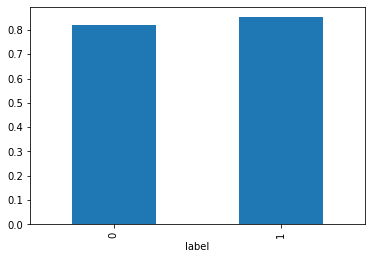

In [14]:
train_data.groupby('label')['mean_pooing'].mean().plot(kind='bar')

## max-pooling

In [15]:
train_sentence1_meanfeat = np.vstack([x.max(0) for x in train_sentence1_feat])
train_sentence2_meanfeat = np.vstack([x.max(0) for x in train_sentence2_feat])

from sklearn.preprocessing import normalize
train_sentence1_meanfeat = normalize(train_sentence1_meanfeat)
train_sentence2_meanfeat = normalize(train_sentence2_meanfeat)

max_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_meanfeat, train_sentence2_meanfeat)]
train_data['max_pooing'] = max_pooing_distance

<AxesSubplot:xlabel='label'>

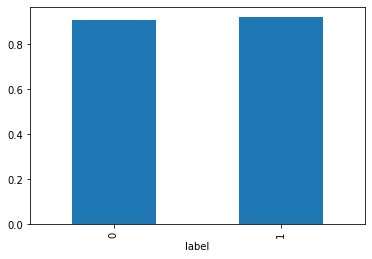

In [16]:
train_data.groupby('label')['max_pooing'].mean().plot(kind='bar')

## TFIDF Pooling

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100000)
tfidf.fit([' '.join(x) for x in train_sentence1 + train_sentence2])

TfidfVectorizer(max_features=100000)

In [18]:
tfidf.idf_[tfidf.vocabulary_['蚂蚁']]

2.521590339312075

In [19]:
def tfidf_pooing(sentence, sentence_word2vec):
    weights = []
    feats = []
    for word,feat in zip(sentence, sentence_word2vec):
        if word in tfidf.vocabulary_:
            weights.append(tfidf.idf_[tfidf.vocabulary_[word]])
            feats.append(feat)
    weights = np.array(weights)
    feats = np.array(feats)
    
    if len(feats) == 0:
        return np.zeros(100)
    else:
        return np.matmul(weights, feats)

In [61]:
train_sentence1_tfidffeat = [tfidf_pooing(sentence, sentence_feat) 
    for sentence, sentence_feat in zip(train_sentence1[:], train_sentence1_feat[:])]

train_sentence2_tfidffeat = [tfidf_pooing(sentence, sentence_feat) 
    for sentence, sentence_feat in zip(train_sentence2[:], train_sentence2_feat[:])]

In [63]:
from sklearn.preprocessing import normalize

train_sentence1_tfidffeat = np.vstack(train_sentence1_tfidffeat)
train_sentence2_tfidffeat = np.vstack(train_sentence2_tfidffeat)

train_sentence1_tfidffeat = normalize(train_sentence1_tfidffeat)
train_sentence2_tfidffeat = normalize(train_sentence2_tfidffeat)

tfidf_pooing_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_tfidffeat, train_sentence2_tfidffeat)]
train_data['tfidf_pooing'] = tfidf_pooing_distance

<AxesSubplot:xlabel='label'>

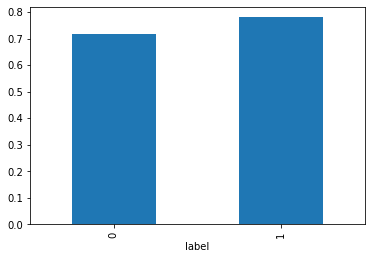

In [64]:
train_data.groupby('label')['tfidf_pooing'].mean().plot(kind='bar')

## SIF Embedding

> https://github.com/PrincetonML/SIF/blob/master/src/SIF_embedding.py

In [25]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
svd.fit(train_sentence1_tfidffeat)

TruncatedSVD(n_components=1, n_iter=7, random_state=0)

In [26]:
train_sentence1_siffeat = train_sentence1_tfidffeat - \
        train_sentence1_tfidffeat.dot(np.transpose(svd.components_)).dot(svd.components_)
    
train_sentence2_siffeat = train_sentence2_tfidffeat - \
        train_sentence2_tfidffeat.dot(np.transpose(svd.components_)).dot(svd.components_)

In [27]:
train_sentence1_siffeat = normalize(train_sentence1_siffeat)
train_sentence2_siffeat = normalize(train_sentence2_siffeat)

sif_embedding_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_siffeat, train_sentence2_siffeat)]
train_data['sif_embedding'] = sif_embedding_distance

<AxesSubplot:xlabel='label'>

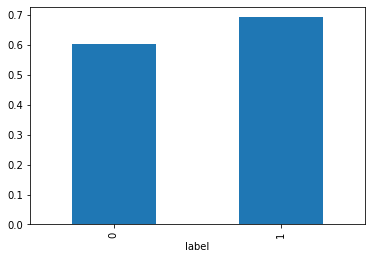

In [28]:
train_data.groupby('label')['sif_embedding'].mean().plot(kind='bar')

In [29]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding
,mean,mean,mean,mean
label,,,,
0,0.818722,0.909529,0.718189,0.603005
1,0.851903,0.919885,0.780175,0.692493


In [74]:
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=0)
svd.fit(train_sentence1_tfidffeat)

train_sentence1_usiffeat = train_sentence1_tfidffeat.copy()
train_sentence2_usiffeat = train_sentence2_tfidffeat.copy()

proj = lambda a, b: a.dot(b.transpose()) * b
for i in range(3):
    lambda_i = (svd.singular_values_[i] ** 2) / (svd.singular_values_ ** 2).sum()
    pc = svd.components_[i]
    train_sentence1_usiffeat = [ v_s - lambda_i * proj(v_s, pc) for v_s in train_sentence1_usiffeat]
    train_sentence2_usiffeat = [ v_s - lambda_i * proj(v_s, pc) for v_s in train_sentence2_usiffeat]

In [75]:
train_sentence1_usiffeat = np.vstack(train_sentence1_usiffeat)
train_sentence2_usiffeat = np.vstack(train_sentence2_usiffeat)

train_sentence1_tfidffeat = normalize(train_sentence1_usiffeat)
train_sentence2_tfidffeat = normalize(train_sentence2_usiffeat)

usif_embedding_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_usiffeat, train_sentence2_usiffeat)]
train_data['usif_embedding'] = usif_embedding_distance

<AxesSubplot:xlabel='label'>

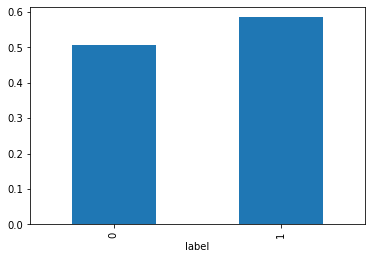

In [76]:
train_data.groupby('label')['usif_embedding'].mean().plot(kind='bar')

In [77]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean'],
    'usif_embedding': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding,usif_embedding
,mean,mean,mean,mean,mean
label,,,,,
0,0.818722,0.909529,0.718189,0.603005,0.507293
1,0.851903,0.919885,0.780175,0.692493,0.584793


In [83]:
train_sentence1_feat[0].shape

(11, 100)

In [103]:
def gen_mean(vals, p):
    p = float(p)
    return np.power(
        np.mean(
            np.power(
                np.array(vals, dtype=complex),
                p),
            axis=0),
        1 / p
    )

def get_sentence_embedding(word_embeddings):
    concat_embs = []
    if len(word_embeddings) == 0:
        return np.zeros(500)
    concat_embs += [np.mean(word_embeddings, axis=0)]
    concat_embs += [np.max(word_embeddings, axis=0)]
    concat_embs += [np.min(word_embeddings, axis=0)]
    concat_embs += [gen_mean(word_embeddings, p=2.0).real]
    concat_embs += [gen_mean(word_embeddings, p=3.0).real]
    sentence_embedding = np.concatenate(
                concat_embs,
                axis=0
            )
    return sentence_embedding

train_sentence1_pmeansfeat = [get_sentence_embedding(feat) for feat in train_sentence1_feat]
train_sentence2_pmeansfeat = [get_sentence_embedding(feat) for feat in train_sentence2_feat]

train_sentence1_pmeansfeat = np.vstack(train_sentence1_pmeansfeat)
train_sentence2_pmeansfeat = np.vstack(train_sentence2_pmeansfeat)

train_sentence1_pmeansfeat = normalize(train_sentence1_pmeansfeat)
train_sentence2_pmeansfeat = normalize(train_sentence2_pmeansfeat)

pmeans_embedding_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_pmeansfeat, train_sentence2_pmeansfeat)]
train_data['pmeans_embedding'] = pmeans_embedding_distance

In [104]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean'],
    'usif_embedding': ['mean'],
    'pmeans_embedding': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding,usif_embedding,pmeans_embedding
,mean,mean,mean,mean,mean,mean
label,,,,,,
0,0.818722,0.909529,0.718189,0.603005,0.507293,0.910251
1,0.851903,0.919885,0.780175,0.692493,0.584793,0.921331


## doc2vec

In [174]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [193]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_sentence1+train_sentence2)]
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=-1)

In [194]:
train_sentence1_doc2feat = [model.infer_vector(x) for x in train_sentence1]
train_sentence2_doc2feat = [model.infer_vector(x) for x in train_sentence2]

In [195]:
train_sentence1_doc2feat = np.vstack(train_sentence1_doc2feat)
train_sentence2_doc2feat = np.vstack(train_sentence2_doc2feat)

train_sentence1_doc2feat = normalize(train_sentence1_doc2feat)
train_sentence2_doc2feat = normalize(train_sentence2_doc2feat)

doc2vec_distance = [np.dot(x, y) for x, y in 
                        zip(train_sentence1_doc2feat, train_sentence2_doc2feat)]
train_data['doc2vec'] = doc2vec_distance

In [200]:
train_data.groupby('label').agg({
    'mean_pooing': ['mean'],
    'max_pooing': ['mean'],
    'tfidf_pooing': ['mean'],
    'sif_embedding': ['mean'],
    'doc2vec': ['mean']
})

,mean_pooing,max_pooing,tfidf_pooing,sif_embedding,doc2vec
,mean,mean,mean,mean,mean
label,,,,,
0,0.824265,0.910736,0.720056,0.604179,1.087763e-07
1,0.856910,0.921142,0.781910,0.693707,-1.096150e-04


# 序列模型

In [201]:
import torch
from torch import nn

## RNN

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN

In [205]:
# input_size, hidden_size, num_layers
model = nn.RNN(10, 20, 2)

# sequence length, batch size, input_size
input = torch.randn(10, 1, 10)

output, hn = model(input)

In [206]:
output.shape, hn.shape

(torch.Size([10, 1, 20]), torch.Size([2, 1, 20]))

## LSTM

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM

In [166]:
# input_size, hidden_size, num_layers
model = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)

output, (hn, cn) = model(input)

In [167]:
output.shape, hn.shape, cn.shape

(torch.Size([5, 3, 20]), torch.Size([2, 3, 20]), torch.Size([2, 3, 20]))